In [1]:
import matplotlib.pyplot as plt

import numpy as np
import random
import string

<h3> En generell start <h3>

Et lite forord før du begynner å lese selve koden, vi har valgt å ta utgangspunkt i den utdelte artikkelens "yard sale" modell, vi har videre valgt å la kun 2 agenter trade per iterasjon og disse blir valgt tilfeldig for hver gang. Først lager vi funksjonen flipCoin som er ganske rett fram en 50/50 sjanse for å få True eller False, dette er det som bestemmer hvem som vinner eller taper.

In [2]:
def flipCoin():
    return random.choice([True,False])

#First we make a random win condition

for i in range(8):
    if flipCoin() == True:
        print("it is true")
    else:
        print("it is false")

#Then we set up the transactions
    

it is true
it is true
it is true
it is true
it is true
it is true
it is true
it is false


Videre har vi i brakken under kodet den første versjonen av vår handelsmetode, men kun med 2 agenter. denne blir senere genralisert til en funksjon som vi kommer til å bli kjent med senere i dokumentet. Vi ser da at resultatet av trading loopen vår er at en av agentene vinner, men vi observerer også at gjennom statistisk "flaks" hvor en agent plutselig vinner n antall ganger på rad får et lite comeback. Vi har sett på eventuelle winconditions for å stoppe dette, vi har inkludert en, men vi er usikker på hvor mye en agents skal sitte med av systemverdien før de blir erklært som vinneren.

This is how many times the different agents have won the tradingbattle 1024,976


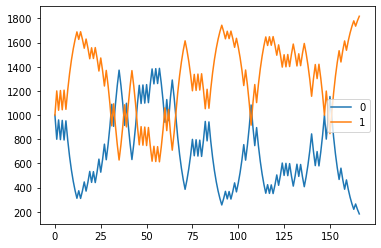

In [6]:
N = 5000

agents = 2


"""
people = np.zeros((N,agents))
people[:] = np.NaN
people[0,:] = np.array([1000,1000])
systemwealth = np.sum(people[0,:])
"""

# counter for wins in individual trades
win0 = 0
win1 = 0
#counter for overall win
final0 = 0
final1 = 0



for j in range(2000): #Vi battler 20 ganger
    
    people = np.zeros((N,2))
    people[:] = np.NaN
    people[0,:] = np.array([1000,1000])
    systemwealth = np.sum(people[0,:])

  
    
    for i in range(N-1): #Dette er selve traden
        """
        Her sjekker vi om noen har vunnet, dersom en person vinner så legger vi til 1 på antall ganger vunnet,
        hvor mange ganger de har vunnet printes helt til slutt, vi antar at antall wins for begge to skal være relativt lik.
        
        """
        if people[i,0] >= 0.90*systemwealth:
            #print("breaktime 1")
            final0 +=1
            k = i
            break
        elif people[i,1] >= 0.90*systemwealth:
            #print("breaktime 2")
            final1 += 1
            k = i
            break

        
        #checking who has more wealth, the agent with least wealth becomes the basis for calculating loss or win.
        if people[i,0] < people[i,1]:
            w = people[i,0] #amount gambeled determined by the wealth of the poorest 
            normal = 0
            rich = 1
        elif people[i,0] > people[i,1]:
            w = people[i,1] 
            normal = 1
            rich = 0
        else: #equal wealth
            w = people[i,1]
            rich = 2
            normal = 1

        firstwins = flipCoin()

        #normal wins
        if rich != 2 and (firstwins == True):
            people[i+1,normal] = people[i,normal] + 0.2 * w #beta
            people[i+1,rich] = people[i,rich] - 0.2 * w #chad



            #normal loses
        elif rich != 2 and (firstwins== False): 
            people[i+1,normal] = people[i,normal] - 0.17 * w #beta
            people[i+1,rich] = people[i,rich] + 0.17 * w #chad

            #they are equal, so no-one is rich or poor, but someone has to win.
        elif rich == 2 and (firstwins == True):
            people[i+1,0] = people[i,0] - 0.2 * w 
            people[i+1,1] = people[i,1] + 0.2 * w 
            
        elif rich == 2 and (firstwins == False):
            people[i+1,1] = people[i,1] - 0.2 * w 
            people[i+1,0] = people[i,0] + 0.2 * w 



    

    


#plotter selve resultatet
plt.plot(people[:,0],label = "0")

plt.plot(people[:,1], label = "1")
plt.legend()
print(f"This is how many times the different agents have won the tradingbattle {final0},{final1}")


Videre ser vi her at resultatet blir at en av de to agenten sitter igjen med alle pengene, en gang i blant kan man også observere et comeback som ikke egentlig passer inn i modellen, men siden vi ikke har en wincondition ferdig helt enda så må bare denne typen behaviour få oppstå. Vi antar også at siden de har 50/50 sjanse for å vinne hver trade at de burde vinne nesten like mange trade sekvenser, noe det virker som om de gjør utifra det som printes. De vinner ikke akkurat like mye, men nære nok.

<h3> Omgjøring til funksjoner <h3>

Videre vil vi gjerne utvikle dette til en funksjon slik at vi kan trade med flere agenter. Vi begynner da med å lage to nye funksjoner, funksjonen finder() returnerer et tilfeldig element fra en liste, funksjonen elector tar inn en liste of returnerer to elementer fra den listen. Dette brukes ved at vi velger ut indekser som sammsvarer med agenter, to indekser som er ulike blir valgt ut og de er de som skal trade.

In [21]:
agents2 = 5

agentslist = [i for i in range(agents2)]

def finder(listvar):
    """
    This just findes a random item from a list
    """
    return random.choice(listvar)

def elector(listvar):
    """
    Takes a list of numbers or agents, returnes two different agents who will then trade 
    """
    newlist = list.copy(listvar)
    agent1 = finder(newlist)
    newlist.remove(agent1)
    
    agent2 = finder(newlist)
    return [agent1, agent2]

print(agentslist)
elector(agentslist)


[0, 1, 2, 3, 4]


[3, 2]

Videre bruker vi elector funksjonen samt trader loopen for å lage en traderfunksjon som vist under. Den fungerer enkelt og greit ved å ta inn en liste (eller tuple burde også fungere), av 2 verdier for så å utføre en trade med de verdiene, deretter returnerer den de nye verdiene. Videre lager vi en ny matrise med n antall agenter, vi lar dem trade over et vist antall iterasjoner og vi plotter resultatet samt printer hvor mange ganger de respektive agentene har handlet, vi vil ikke at noen av agentene våre skal handle mer enn andre, noe det virker som om de ikke gjør.

[10026.  9922. 10037.  9980. 10036. 10019.  9864.  9975.  9914. 10225.]


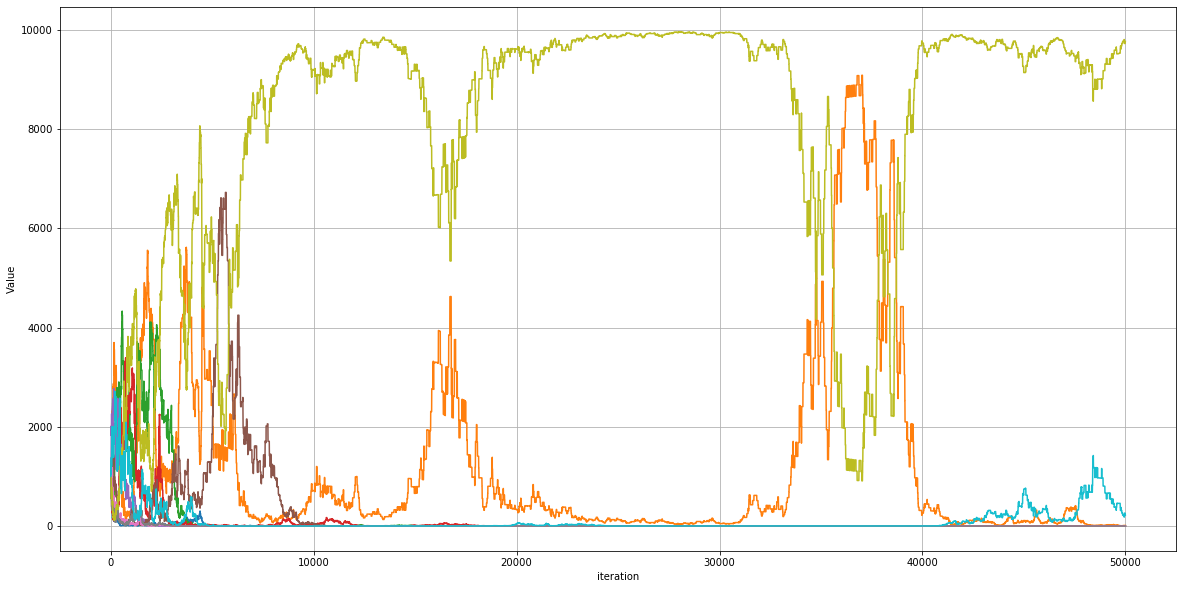

In [9]:


def traderfunc(people):    
    peoplenew = [0,0]



        #checking who has more wealth, he is chad
    if people[0] < people[1]:
        w = people[0] #amount gambeled determined by the wealth of the poorest 
        normal = 0
        rich = 1
    elif people[0] > people[1]:
        w = people[1] 
        normal = 1
        rich = 0
    else: #equal wealth
        w = people[1]
        rich = 2
        normal = 1

    firstwins = flipCoin()

    #Betavirgin wins
    if rich != 2 and (firstwins == True):
        peoplenew[normal] = people[normal] + 0.2 * w #beta
        peoplenew[rich] = people[rich] - 0.2 * w #chad



        #Betavvirgin loses
    elif rich != 2 and (firstwins== False): 
        peoplenew[normal] = people[normal] - 0.17 * w #beta
        peoplenew[rich] = people[rich] + 0.17 * w #chad


    elif rich == 2 and (firstwins == True):
        peoplenew[0] = people[0] - 0.2 * w 
        peoplenew[1] = people[1] + 0.2 * w 

    elif rich == 2 and (firstwins == False):
        peoplenew[1] = people[1] - 0.2 * w 
        peoplenew[0] = people[0] + 0.2 * w 
            
            
    return peoplenew





N = 50000
ant_agents = 10
matrix = np.zeros((N,ant_agents))
for i in range(ant_agents):
    matrix[0,i] = 1000
indexagents = [i for i in range(ant_agents)]

counter = np.zeros(ant_agents)

for i in range(N-1):
    matrix[i+1,:] = matrix[i,:]
    for j in range(1):
        
        e1,e2 = elector(indexagents)
        newval1,newval2 = traderfunc([matrix[i,e1],matrix[i,e2]])
        matrix[i+1,e1] = newval1
        matrix[i+1,e2] = newval2

        counter[e1] +=1
        counter[e2] +=1
    
#print(matrix[-1,:])

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid()
plt.ylabel("Value")
plt.xlabel("iteration")

print(counter)


for i in range(ant_agents):
    ax.plot(matrix[:,i])

Vi ser da at alle de som handler med hverandre her handler omlag like mye, videre ser vi enda klarere at her utvikler det seg et par eller en oligark. Det virker etter gjentatte tester at de fleste av agentene taper all verdi på "starten" også sitter noen folk igjen med mesteparten av systemverdien. Videre ser vi igjen at noen av agenetene utfører det statistiske mirakelet med å få et comeback. Dette kan enkelt unngås ved å legge inn en konkursfunksjon, men dette er vi ikke helt sikker på om vi vil inkludere enda, fordeler er at vi unngår statistiske mirkakel, ulempen er at mirakel i økonomien faktisk skjer og dette vil da utela den sjansen, videre utelar dette også flaks og "slump" som er en viktig del av liver. Dette med en wincondition og en konkurscondition skal diskuteres videre. Det vi eventuelt kan gjøre videre er å sette opp en fordelingsmodell, conditions for win og konkurs eller eventuelt prøve å sammenligne dette med fysikk.